# CMPS 360: HOMEWORK #2 (55 Points)

## Very important notes
Please read these notes very carefully.
- Please complete this notebook by filling in the cells provided.
- For all problems that you must write explanations and sentences for, you **must** provide your answer in the **designated space**.
- Moreover, throughout this homework and all future ones, please be sure to **not re-assign variables** throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.
- Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.
- You should start early so that you have time to get help if you're stuck.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Rolling Dice Simulation (10 Points)

After finishing the simulation lecture, Mona decided to spend the rest of her night rolling a standard six-sided die. She wants to know what her total score would be if she rolls the die 1000 times. Write code that simulates her total score after 1000 rolls.

**Question 1:** Define a function called `simulate_one_trial` which simulates rolling a die `num_rolls` times and sum the total numbers she gets. **(2 Points)**

In [2]:
def simulate_one_trial(num_rolls):

    rolls = np.random.randint(1, 7, num_rolls)
    return np.sum(rolls)

total_score = simulate_one_trial(1000)
total_score

3469

**Question 2:** Calling the above function is considered one experiment. Write code to repeat that experiment 10,000 times and save all outcomes in an array called `outcomes`. **(3 Points)**

In [3]:
repetitions = 10000
num_rolls = 1000

outcomes = np.array([simulate_one_trial(num_rolls) for _ in range(repetitions)])

outcomes

array([3538, 3508, 3495, ..., 3659, 3527, 3420])

<!-- BEGIN QUESTION -->

**Question 3:** Draw a histogram for the above outcomes using bins of width 5 in the range 3400 and 3600. **(2 Points)**

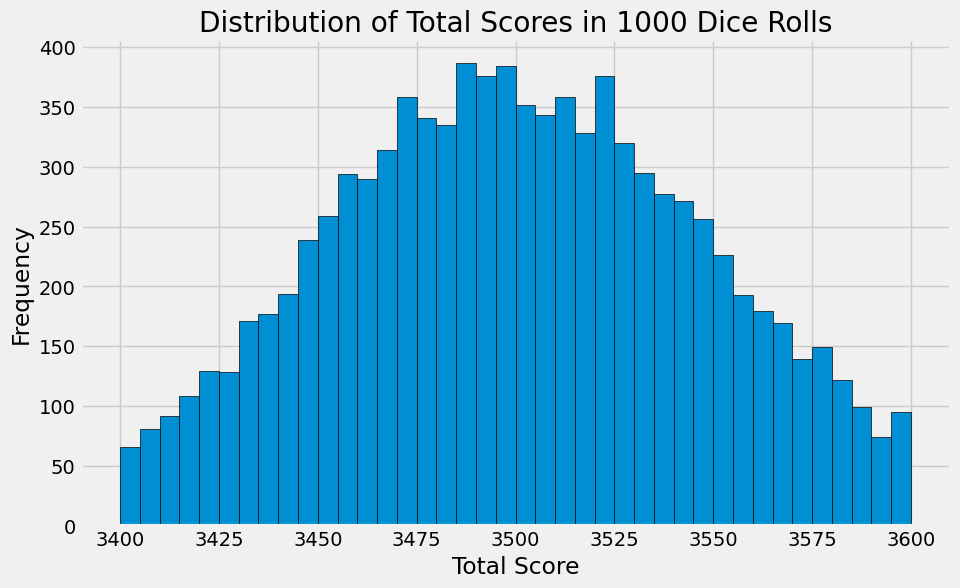

In [5]:
#histogram with specified parameters
plots.figure(figsize=(10, 6))
plots.hist(outcomes, bins=range(3400, 3605, 5), edgecolor='black')
plots.title('Distribution of Total Scores in 1000 Dice Rolls')
plots.xlabel('Total Score')
plots.ylabel('Frequency')
plots.show()

<!-- END QUESTION -->

**Question 4:** Is the above histogram showing probability or empirical distribution?
Assign distribution_option below to either 1 or 2. **(1 Point)**

1. Probability Distribution
2. Empirical Distribution

In [6]:
distribution_option = 2  # This is an Empirical Distribution

**Question 5:** Is the conclusion of the simulation (considering what you saw in the histogram) **''expected''**? Explain. **(2 Points)**

The conclusion is expected. Here's why:
When rolling a fair die 1000 times, we expect each roll to average around 3.5 (mean of numbers 1-6)

Therefore, for 1000 rolls, we expect a total around 3500 (1000 × 3.5)

The histogram shows most outcomes clustered around 3500, following a roughly normal distribution

This is expected due to the Central Limit Theorem, which states that the sum of many independent random variables tends to follow a normal **distribution**

## 2. Vaccinations Across The Nation (16 Points)

A vaccination clinic has two types of vaccines against a disease. Each person who comes in to be vaccinated gets either Vaccine 1 or Vaccine 2. One week, everyone who came in on Monday, Wednesday, and Friday was given Vaccine 1. Everyone who came in on Tuesday and Thursday was given Vaccine 2. The clinic is closed on weekends.

Doctor DeNero at the clinic said, "Oh wow, it's just like tossing a coin that lands heads with chance $\frac{3}{5}$. Heads you get Vaccine 1 and Tails you get Vaccine 2."

But Doctor Sahai said, "No, it's not. We're not doing anything like tossing a coin."

That week, the clinic gave Vaccine 1 to 211 people and Vaccine 2 to 107 people. Conduct a test of hypotheses to see which doctor's position is better supported by the data.

**Question 2.1.** Given the information above, what was the sample size for the data, and what was the percentage of people who got **Vaccine 1?** **(2 points)**

*Note*: Your percent should be a number between 0 and 100.


In [7]:
sample_size = 211 + 107  # Total number of people
percent_V1 = (211/sample_size) * 100

print(f"Sample Size: {sample_size}")
print(f"Vaccine 1 Percent: {percent_V1}")

Sample Size: 318
Vaccine 1 Percent: 66.35220125786164


**Question 2.2.** State the null hypothesis. It should reflect the position of either Dr. DeNero or Dr. Sahai. **(1 point)**

**Null Hypothesis: The process is equivalent to tossing a
coin that lands heads (Vaccine 1) with probability 3/5 (Dr. DeNero's position)**

**Question 2.3.** State the alternative hypothesis. It should reflect the position of the doctor you did not choose to represent in Question 1.2. **(1 point)**

**Alternative Hypothesis: The process is not equivalent to tossing such a coin (Dr. Sahai's position)**

**Question 2.4.** One of the test statistics below is appropriate for testing these hypotheses. Assign the variable `valid_test_stat` to the number corresponding to the correct test statistic. **(2 points)**

1. percent of heads - 60
2. percent of heads - 50
3. |percent of heads - 60|
4. |percent of heads - 50|


In [9]:
valid_test_stat = 1  # "percent of heads - 60"
valid_test_stat

1

**Question 2.5.** Using your answer from Questions 1.1 and 1.4, find the observed value of the test statistic and assign it to the variable `observed_statistic`. **(2 points)**


In [10]:
observed_statistic = (211/sample_size * 100) - 60
observed_statistic

6.352201257861637

**Question 2.6.** In order to perform this hypothesis test, you must simulate the test statistic. From the four options below, pick the assumption that is needed for this simulation. Assign `assumption_needed` to an integer corresponding to the assumption. **(1 point)**

1. The statistic must be simulated under the null hypothesis.
2. The statistic must be simulated under the alternative hypothesis.
3. The statistic must be simulated under both hypotheses.
4. No assumptions are needed. We can just simulate the statistic.


In [11]:
assumption_needed = 1  # The statistic must be simulated under the null hypothesis
assumption_needed

1

**Question 2.7.** Simulate 20,000 values of the test statistic under the assumption you picked in Question 1.6. **(4 points)**

As usual, start by defining a function that simulates one value of the statistic. Then, collect multiple simulated values in the array `simulated_statistics`.

Use as many lines of code as you need. We have included the code that visualizes the distribution of the simulated values. The red dot represents the observed statistic you found in Question 1.5.

In [14]:
def one_simulated_statistic():
    # Simulate one sample under null hypothesis (p=0.6)
    simulated_sample = np.random.random(sample_size) < 0.6
    percent_heads = np.mean(simulated_sample) * 100
    return percent_heads - 60

num_simulations = 20000

simulated_statistics = make_array()
for i in range(num_simulations):
    simulated_statistics = np.append(simulated_statistics, one_simulated_statistic())

# Run the this cell a few times to see how the simulated statistic changes
one_simulated_statistic()

4.4654088050314442

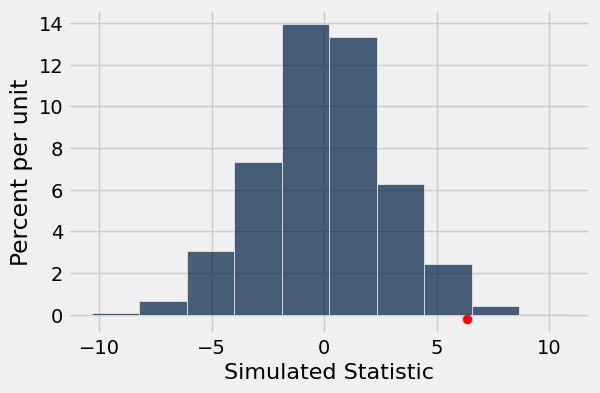

In [16]:
# Run this cell to produce a histogram of the simulated statistics

Table().with_columns('Simulated Statistic', simulated_statistics).hist()
plots.scatter(observed_statistic, -0.002, color='red', s=40);

**Question 2.8.** Using `simulated_statistics`, `observed_statistic`, and `num_simulations`, find the empirical p-value based on the simulation. **(2 points)**


In [17]:
p_value = np.count_nonzero(simulated_statistics >= observed_statistic) / num_simulations
p_value

0.01175

**Question 2.9.** Assign `correct_doctor` to the number corresponding to the correct statement below. Use the 5% cutoff for the p-value. **(1 points)**

1. The data support Dr. DeNero's position more than they support Dr. Sahai's.
2. The data support Dr. Sahai's position more than they support Dr. DeNero's.

As a reminder, here are the two claims made by Dr. DeNero and Dr. Sahai:
> **Doctor DeNero:** "Oh wow, it's just like tossing a coin that lands heads with chance $\frac{3}{5}$. Heads you get Vaccine 1 and Tails you get Vaccine 2."

>**Doctor Sahai:** "No, it's not. We're not doing anything like tossing a coin."


In [18]:
correct_doctor = 2  # The data support Dr. Sahai's position more than Dr. DeNero's
correct_doctor

2

## 3. Happiness of a Country (13 Points)

In this question, we will be working with data from the [Gallup World Poll](https://www.gallup.com/analytics/349487/gallup-global-happiness-center.aspx#:~:text=World%20Happiness%20Report&text=Using%20the%20Gallup%20World%20Poll,about%20the%20World%20Happiness%20Report.) that is presented in the World Happiness Report, a survey of the state of global happiness. The survey ranked 155 countries by overall happiness and estimated the influence that economic production, social support, life expectancy, freedom, absence of corruption, and generosity had on population happiness. The study has been repeated for several years, but we'll be looking at data from the 2016 survey.

Run the cell below to load in the `happiness_scores` table.

In [19]:
happiness_scores = Table.read_table("happiness_scores.csv")
happiness_scores.show(5)

Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
Switzerland,Western Europe,2,7.509,7.428,7.59,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.1269,0.79579,0.59609,0.35776,0.37895
Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


Participants in the study were asked to evaluate their life satisfaction from a scale of 0 (worst possible life) to 10 (best possible life). The responses for each country were averaged to create the `Happiness Score`.

The columns `Economy (GDP per Capita)`, `Family`, `Health (Life Expectancy)`, `Freedom`, `Trust (Government Corruption)`, and `Generosity` estimate the extent to which each factor influences happiness, both for better or for worse. The happiness score is the sum of these factors; the larger a factor is, the more it contributes to overall happiness. [In other words, if you add up all the factors (in addition to a "Difference from Dystopia" value we excluded in the dataset), you get the happiness score.]

Let's look at the different factors that affect happiness in Qatar. Run the cell below to view the row in `qatar_happiness` that contains data for Qatar.

In [20]:
qatar_happiness = happiness_scores.where("Country", "Qatar")
qatar_happiness

Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Qatar,Middle East and Northern Africa,36,6.375,6.178,6.572,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388


**To compare the different factors, we'll look at the proportion of the happiness score that is attributed to each variable.
You can find these proportions in the table `qatar_happiness_factors` after running the cell below.**

*Note:* The factors shown in `qatar_happiness` don't add up exactly to the happiness score, so we adjusted the proportions to  only account for the data we have access to. The proportions were found by dividing each Happiness Factor value by the sum of all Happiness Factor values in `qatar_happiness`.

In [21]:
qatar_happiness_factors = Table().read_table("qatar_happiness_factors.csv")
qatar_happiness_factors

Happiness Factor,Proportion of Happiness Score
Economy (GDP per Capita),0.380667
Family,0.183553
Health (Life Expectancy),0.149663
Freedom,0.118271
Trust (Government Corruption),0.100263
Generosity,0.0675834


**Question 3.1.** Suppose we want to test whether or not each factor contributes the same amount to the overall Happiness Score. Define the null hypothesis, alternative hypothesis, and test statistic in the cell below. **(3 points)**

*Note:* Please format your answer as follows:
- Null Hypothesis: ...  
- Alternative Hypothesis: ...  
- Test Statistic: ...  


**Null Hypothesis:** All factors contribute equally to Qatar's happiness score (each factor contributes 1/6 of the total)

**Alternative Hypothesis:** Not all factors contribute equally to Qatar's happiness score

**Test Statistic:** The sum of absolute differences between observed and expected proportions_Type your answer here, replacing this text._

**Question 3.2.** Write a function `calculate_test_statistic` that takes in the observed distribution (`obs_dist`) and expected distribution under the null hypothesis (`null_dist`) and calculates the test statistic. Use this function to set `observed_ts` to be equal to the observed test statistic. **(2 points)**

In [22]:
null_distribution = np.ones(6) * (1/6)

def calculate_test_statistic(obs_dist, null_dist):
    differences = np.abs(obs_dist - null_dist)
    return np.sum(differences)

observed_ts = calculate_test_statistic(qatar_happiness_factors.column(1), null_distribution)
observed_ts

0.46177270533333331

**Question 3.3.** Create an array called `simulated_ts` that contains 10,000 simulated values under the null hypothesis. Assume that the original sample consisted of 1,000 individuals. **(2 points)**

In [24]:
simulated_ts = make_array()

for _ in range(10000):
    simulated_counts = np.random.multinomial(1000, null_distribution)
    simulated_proportions = simulated_counts / 1000
    simulated_statistic = calculate_test_statistic(simulated_proportions, null_distribution)
    simulated_ts = np.append(simulated_ts, simulated_statistic)

simulated_ts

array([ 0.076     ,  0.026     ,  0.046     , ...,  0.06066667,
        0.074     ,  0.02266667])

Run the cell below to plot a histogram of your simulated test statistics, as well as a red dot representing the observed value of the test statistic.

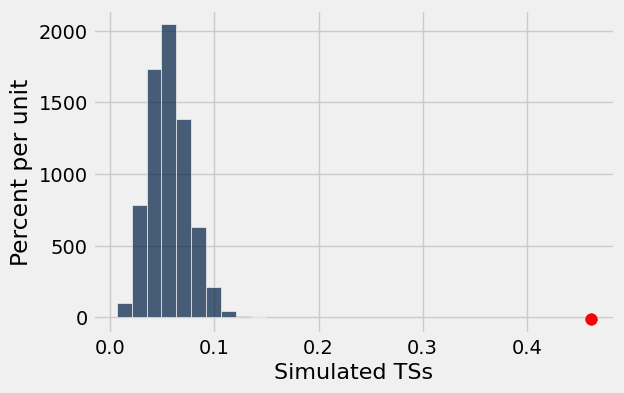

In [25]:
Table().with_column("Simulated TSs", simulated_ts).hist()
plots.scatter(observed_ts, -0.1, color='red', s=70, zorder=2);
plots.show();

**Question 3.4.** Use your simulated statistics to calculate the p-value of your test. Make sure that this number is consistent with what you observed in the histogram above. **(2 points)**


In [27]:
p_value_ts = np.count_nonzero(simulated_ts >= observed_ts) / len(simulated_ts)
p_value_ts

0.0

**Question 3.5.** What can you conclude about how each
factor contributes to the overall happiness score in Qatar? Explain your answer using the results of your hypothesis test. Assume a p-value cutoff of 5%. **(2 points)**


If the p-value (p_value_ts) is less than 0.05:

***Conclusion:*** We reject the null hypothesis.

***Interpretation:*** The data provide sufficient evidence to conclude that not all factors contribute equally to the happiness score in Qatar. Some factors have a more significant impact than others.

If the p-value (p_value_ts) is greater than or equal to 0.05:

***Conclusion:*** We fail to reject the null hypothesis.

***Interpretation:*** The data do not provide sufficient evidence to conclude that the factors contribute unequally. The observed differences in contributions could be due to random variation.

**Explanation:**

A p-value less than 0.05 indicates that the observed distribution of factor contributions is unlikely to occur if all factors contributed equally. This suggests that some factors are more influential than others in determining the happiness score.

Conversely, a p-value greater than or equal to 0.05 suggests that the observed distribution is consistent with equal contributions from all factors, meaning any observed differences could be due to chance.

## 4. Who is Older? (16 Points)

Data scientists have drawn a simple random sample of size 500 from a large population of adults. Each member of the population happened to identify as either "male" or "female". Data was collected on several attributes of the sampled people, including age. The table `sampled_ages` contains one row for each person in the sample, with columns containing the individual's gender identity.

In [28]:
sampled_ages = Table.read_table('age.csv')
sampled_ages.show(5)

Gender,Age
male,23
male,29
male,29
female,49
female,33


**Question 4.1.** How many females were there in our
sample? Please use the provided skeleton code. **(1 point)**


In [29]:
num_females = sampled_ages.group('Gender').where('Gender', 'female').column('count').item(0)
num_females

260

**Question 4.2.** Complete the cell below so that `avg_male_vs_female` evaluates to `True` if the sampled males are older than the sampled females on average, and `False` otherwise. Use Python code to achieve this. **(2 points)**


In [30]:
group_mean_tbl = sampled_ages.group('Gender', np.mean)
group_means = group_mean_tbl.column('Age mean')  # array of mean ages
avg_male_vs_female = group_means.item(0) > group_means.item(1)
avg_male_vs_female

False

**Question 4.3.** The data scientists want to use the data to test whether males are older than females—or, in other words, whether the ages of the two groups have the same distribution. One of the following statements is their null hypothesis and another is their alternative hypothesis. Assign `null_statement_number` and `alternative_statement_number` to the numbers of the correct statements in the code cell below. **(2 points)**

1. In the sample, the males and females have the same distribution of ages; the sample averages of the two groups are different due to chance.
2. In the population, the males and females have the same distribution of ages; the sample averages of the two groups are different due to chance.
3. The age distributions of males and females in the population are different due to chance.
4. The males in the sample are older than the females, on average.
5. The males in the population are older than the females, on average.
6. The average ages of the males and females in the population are different.


In [31]:
null_statement_number = 2
alternative_statement_number = 6

**Question 4.4.** The data scientists have decided to use a permutation test. Assign `permutation_test_reason` to the number corresponding to the reason they made this choice. **(1 point)**

1. Since a person's age shouldn't be related to their gender, it doesn't matter who is labeled "male" and who is labeled "female", so you can use permutations.
2. Under the null hypothesis, permuting the labels in the `sampled_ages` table is equivalent to drawing a new random sample with the same number of males and females as in the original sample.
3. Under the null hypothesis, permuting the rows of `sampled_ages` table is equivalent to drawing a new random sample with the same number of males and females as in the original sample.


In [32]:
permutation_test_reason = 2
permutation_test_reason

2

**Question 4.5.** To test their hypotheses, the data scientists have followed our textbook's advice and chosen a test statistic where the following statement is true: Large values of the test statistic favor the alternative hypothesis.

The data scientists' test statistic is one of the two options below. Which one is it? Assign the appropriate number to the variable `correct_test_stat`. **(1 point)**

1. "male age average - female age average" in a sample created by randomly shuffling the male/female labels
2. "|male age average - female age average|" in a sample created by randomly shuffling the male/female labels


In [33]:
correct_test_stat = 1
correct_test_stat

1

**Question 4.6.** Complete the cell below so that `observed_statistic_ab` evaluates to the observed value of the data scientists' test statistic. Use as many lines of code as you need, and remember that you can use any quantity, table, or array that you created earlier. **(1 point)**


In [35]:
group_mean_tbl = sampled_ages.group('Gender', np.mean)

male_mean_age = group_mean_tbl.where('Gender', 'male').column('Age mean').item(0)
female_mean_age = group_mean_tbl.where('Gender', 'female').column('Age mean').item(0)

observed_statistic_ab = male_mean_age - female_mean_age
observed_statistic_ab

1.314102564102562

**Question 4.7.** Assign `shuffled_labels` to an array of shuffled male/female labels. The rest of the code puts the array in a table along with the data in `sampled_ages`. **(1 point)**

In [38]:
shuffled_labels = np.random.permutation(sampled_ages.column('Gender'))

orig_with_shuff_labels = sampled_ages.with_columns('Shuffled Label', shuffled_labels)
orig_with_shuff_labels

Gender,Age,Shuffled Label
male,23,male
male,29,female
male,29,female
female,49,female
female,33,female
male,31,male
male,60,male
male,38,female
female,60,female
female,27,male


**Question 4.8.** The comparison below uses the array `shuffled_labels` from Question 3.7 and the count `num_females` from Question 3.1.

For this comparison, assign the correct number from one of the following options to the variable `correct_q8`. **Pretend this is a midterm problem and solve it without doing the calculation in a code cell.** **(1 point)**

`comp = np.count_nonzero(shuffled_labels == 'female') == num_females`

1. `comp` is set to `True`.
2. `comp` is set to `False`.
3. `comp` is set to `True` or `False`, depending on how the shuffle came out.


In [39]:
correct_q8 = 1  # comp is set to True.

**Question 4.9.** Define a function `simulate_one_statistic` that takes no arguments and returns one simulated value of the test statistic. We've given you a skeleton, but feel free to approach this question in a way that makes sense to you. Use as many lines of code as you need. Refer to the code you have previously written in this problem, as you might be able to re-use some of it. **(2 points)**


In [41]:
def simulate_one_statistic():
    shuffled_labels = np.random.permutation(sampled_ages.column('Gender'))
    shuffled_tbl = sampled_ages.with_columns('Shuffled Label', shuffled_labels)
    group_mean_tbl = shuffled_tbl.group('Shuffled Label', np.mean)
    male_mean_age = group_mean_tbl.where('Shuffled Label', 'male').column('Age mean').item(0)
    female_mean_age = group_mean_tbl.where('Shuffled Label', 'female').column('Age mean').item(0)
    return male_mean_age - female_mean_age

simulate_one_statistic()

0.4326923076923066

After you have defined your function, run the following cell a few times to see how the statistic varies.

In [52]:
simulate_one_statistic()

0.3685897435897445

**Question 4.10.** Complete the cell to simulate 4,000 values of the statistic. We have included the code that draws the empirical distribution of the statistic and shows the value of `observed_statistic_ab` from Question 3.6. Feel free to use as many lines of code as you need. **(2 points)**

*Note:* This cell will take around a minute to run.


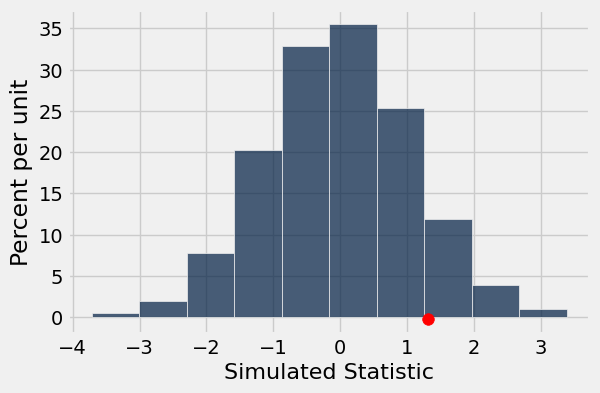

In [54]:
repetitions = 4000
simulated_statistics_ab = make_array()

for _ in range(repetitions):
    simulated_statistics_ab = np.append(simulated_statistics_ab, simulate_one_statistic())

# Do not change these lines
Table().with_columns('Simulated Statistic', simulated_statistics_ab).hist()
plots.scatter(observed_statistic_ab, -0.002, color='red', s=70);

**Question 4.11.** Use the simulation to find an empirical approximation to the p-value. Assign `p_val` to the appropriate p-value from this simulation. Then, assign `conclusion` to either `null_hyp` or `alt_hyp`. **(2 points)**

*Note:* Assume that we use the 5% cutoff for the p-value.


In [55]:
# These are variables provided for you to use.
null_hyp = 'The data are consistent with the null hypothesis.'
alt_hyp = 'The data support the alternative more than the null.'

p_val = np.count_nonzero(simulated_statistics_ab >= observed_statistic_ab) / repetitions

if p_val < 0.05:
    conclusion = alt_hyp
else:
    conclusion = null_hyp

p_val, conclusion  # Do not change this line

(0.10875, 'The data are consistent with the null hypothesis.')

<!-- END QUESTION -->

You're done with Homework 2!  

**Important submission steps:**
1. Choose **Save Notebook** from the **File** menu, then **run the final cell**.
2. Submit **only** this notebook file to **Blackboard**.

**It is your responsibility to make sure your work is saved before submission.**